In [1]:
# Data manipulation and numerical operations
import pandas as pd  # DataFrames and data handling
import numpy as np   # Numerical operations on arrays

# Data visualization libraries
from IPython.display import display, HTML  # Display DataFrames and HTML outputs in notebooks
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns  # Statistical data visualization
from tabulate import tabulate

# WordCloud for creating word cloud visualizations
# (If needed, install once outside the script or in the environment)
# !pip install wordcloud
from wordcloud import WordCloud

# PostgreSQL database connection tools
# (Install once outside script if not installed)
# !pip install sqlalchemy psycopg2-binary
import sqlalchemy  # Creating database engine and queries
from sqlalchemy import create_engine
import psycopg2    # PostgreSQL adapter for Python

# Machine Learning utilities from scikit-learn
from sklearn.model_selection import train_test_split  # Splitting datasets into train/test
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  # Encoding categorical features
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.ensemble import RandomForestClassifier  # Random Forest model
from sklearn.tree import DecisionTreeClassifier  # Decision Tree model
from sklearn.naive_bayes import GaussianNB  # Naive Bayes classifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report, confusion_matrix)  # Model evaluation metrics

# Deep learning libraries (TensorFlow Keras)
import tensorflow as tf
from tensorflow.keras.models import Sequential  # Sequential model API
from tensorflow.keras.layers import (Embedding, LSTM, Dense, Dropout, BatchNormalization)  # Layers for neural nets
from tensorflow.keras.preprocessing.text import Tokenizer  # Text tokenization for NLP
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Sequence padding for NLP
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Training callbacks

# Advanced matplotlib styling tools
from matplotlib import patheffects as PathEffects  # For advanced text effects in plots
from matplotlib.patches import FancyBboxPatch  # Custom-shaped patches in plots

# Suppress warnings to keep notebook output clean
import warnings
warnings.filterwarnings('ignore')

2025-06-08 21:04:51.295377: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load Dataset from CSV file
try:
    data = pd.read_csv('NetflixDataAnalysis.csv')  # Read data into a pandas DataFrame
except Exception as e:
    # Handle error if file not found or any other IO error occurs
    print(f"Failed to load dataset: {e}")
else:
    # Confirmation message if dataset loads without issues
    print("Dataset loaded successfully!\n")

Dataset loaded successfully!



In [3]:
# Display first 10 rows with improved readability and styling
preview = data.head(10).copy()  # Copy first 10 rows to avoid modifying original data
preview.index = range(1, len(preview) + 1)  # Set index starting from 1 instead of 0 for better presentation

# Rename columns to more user-friendly names for display purposes
preview.rename(columns={
    'show_id': 'Show ID',
    'type': 'Type',
    'title': 'Title',
    'director': 'Director',
    'country': 'Country',
    'date_added': 'Date Added',
    'release_year': 'Release Year',
    'rating': 'Rating',
    'duration': 'Duration',
    'listed_in': 'Categories',
    'year_added': 'Year Added',
    'month_added': 'Month Added',
    'duration_num': 'Duration (Number)',
    'duration_unit': 'Duration (Unit)'
}, inplace=True)

# Apply CSS styling to the preview table for nicer visualization in Jupyter/IPython
styled_preview = preview.style.set_table_styles([
    {
        'selector': 'caption',
        'props': [
            ('caption-side', 'top'),
            ('font-size', '16pt'),
            ('font-weight', 'bold'),
            ('text-align', 'center'),
            ('margin-bottom', '10px')
        ]
    },
    {
        'selector': 'thead th',
        'props': [
            ('background-color', '#f0f0f0'),
            ('color', '#000000'),
            ('font-weight', 'bold'),
            ('font-size', '11pt'),
            ('text-align', 'center'),
            ('padding', '10px'),
            ('border-bottom', '2px solid #ccc')
        ]
    },
    {
        'selector': 'tbody td',
        'props': [
            ('background-color', '#ffffff'),
            ('color', '#333333'),
            ('font-size', '11pt'),
            ('text-align', 'center'),
            ('padding', '8px'),
            ('border-bottom', '1px solid #eee')
        ]
    },
    {
        'selector': 'tbody tr:nth-child(even)',
        'props': [('background-color', '#f9f9f9')]  # Alternate row color for readability
    },
    {
        'selector': 'tbody tr:hover',
        'props': [
            ('background-color', '#d1e7fd'),  # Highlight row on hover
            ('cursor', 'pointer'),
            ('transition', 'background-color 0.2s ease')
        ]
    }
]).set_caption("Netflix Data Preview")

# Display the styled table in the notebook
display(styled_preview)

# Show concise summary of dataset: columns, data types, non-null counts
print("\nData Info:")
data.info()

# Check and print the count of missing (null) values per column
print("\nMissing Values:")
missing = data.isnull().sum()
print(missing)

# Inform user if there are no missing values at all
if missing.sum() == 0:
    print("\nNo missing values in the dataset")

# If missing values exist, plot a bar chart to visualize missing count per column
missing = missing[missing > 0]  # Filter columns with missing values only
if not missing.empty:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=missing.index, y=missing.values, palette="pastel")
    plt.title('Missing Values by Column')
    plt.ylabel('Count of Missing Values')
    plt.xlabel('Columns')
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.tight_layout()  # Adjust plot layout to fit everything nicely
    plt.show()

,Show ID,Type,Title,Director,Country,Date Added,Release Year,Rating,Duration,Categories
1,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
2,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure"
3,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
4,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
5,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
6,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
7,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
8,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Musicals"
9,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,9/23/2021,2021,TV-MA,127 min,"Dramas, International Movies"
10,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,5/1/2021,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals"



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB

Missing Values:
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

No missing values in the dataset


In [4]:
# Convert 'date_added' column to datetime format for easier date manipulation
data['date_added'] = pd.to_datetime(data['date_added'])

# Extract year and month from 'date_added' to analyze content addition trends over time
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

# Split 'duration' column into numeric part and unit part
# Example: '90 min' -> 90 (int), 'min' (string)
data['duration_num'] = data['duration'].str.extract('(\d+)').astype(int)  # Extract digits and convert to int
data['duration_unit'] = data['duration'].str.extract('([a-zA-Z]+)')       # Extract text unit like 'min' or 'Season'

# Prepare a preview DataFrame with selected columns and the first 10 rows
preview = data[['date_added', 'year_added', 'month_added', 'duration', 'duration_num', 'duration_unit']].head(10).copy()
preview.index = range(1, len(preview) + 1)  # Reset index to start from 1 for display

# Rename columns for better readability in the preview table
preview.rename(columns={
    'date_added': 'Date Added',
    'year_added': 'Year Added',
    'month_added': 'Month Added',
    'duration': 'Duration',
    'duration_num': 'Duration (Number)',
    'duration_unit': 'Duration (Unit)'
}, inplace=True)

# Apply CSS styling for better visualization in notebook outputs
styled_preview = preview.style.set_table_styles([
    {
        'selector': 'caption',
        'props': [
            ('caption-side', 'top'),
            ('font-size', '16pt'),
            ('font-weight', 'bold'),
            ('text-align', 'center'),
            ('margin-bottom', '10px')
        ]
    },
    {
        'selector': 'thead th',
        'props': [
            ('background-color', '#f0f0f0'),
            ('color', '#000000'),
            ('font-weight', 'bold'),
            ('font-size', '11pt'),
            ('text-align', 'center'),
            ('padding', '10px'),
            ('border-bottom', '2px solid #ccc')
        ]
    },
    {
        'selector': 'tbody td',
        'props': [
            ('background-color', '#ffffff'),
            ('color', '#333333'),
            ('font-size', '11pt'),
            ('text-align', 'center'),
            ('padding', '8px'),
            ('border-bottom', '1px solid #eee')
        ]
    },
    {
        'selector': 'tbody tr:nth-child(even)',
        'props': [('background-color', '#f9f9f9')]  # Alternate row background for readability
    },
    {
        'selector': 'tbody tr:hover',
        'props': [
            ('background-color', '#d1e7fd'),  # Highlight row on hover
            ('cursor', 'pointer'),
            ('transition', 'background-color 0.2s ease')
        ]
    }
]).set_caption("Netflix Duration and Date Added Preview")

# Display the styled preview table
display(styled_preview)

,Date Added,Year Added,Month Added,Duration,Duration (Number),Duration (Unit)
1,2021-09-25 00:00:00,2021,9,90 min,90,min
2,2021-09-24 00:00:00,2021,9,1 Season,1,Season
3,2021-09-24 00:00:00,2021,9,1 Season,1,Season
4,2021-09-22 00:00:00,2021,9,91 min,91,min
5,2021-09-24 00:00:00,2021,9,125 min,125,min
6,2021-09-24 00:00:00,2021,9,9 Seasons,9,Seasons
7,2021-09-24 00:00:00,2021,9,104 min,104,min
8,2021-05-01 00:00:00,2021,5,87 min,87,min
9,2021-09-23 00:00:00,2021,9,127 min,127,min
10,2021-05-01 00:00:00,2021,5,76 min,76,min


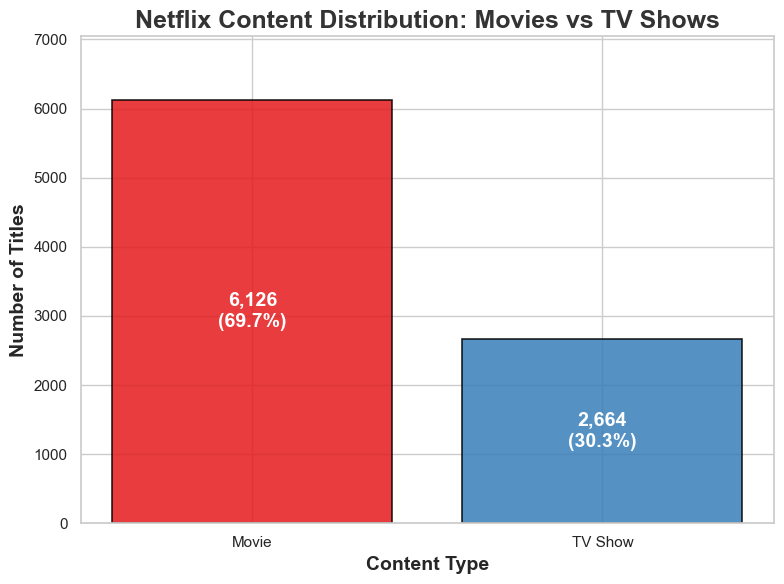

The dataset contains a total of 8,790 titles. 'Movie' is the dominant content type, comprising 6,126 titles which is about 69.7% of the catalog. The remaining 2,664 titles (30.3%) are other types. This suggests Netflix primarily offers movie content but maintains a notable presence of other types for audience diversity.


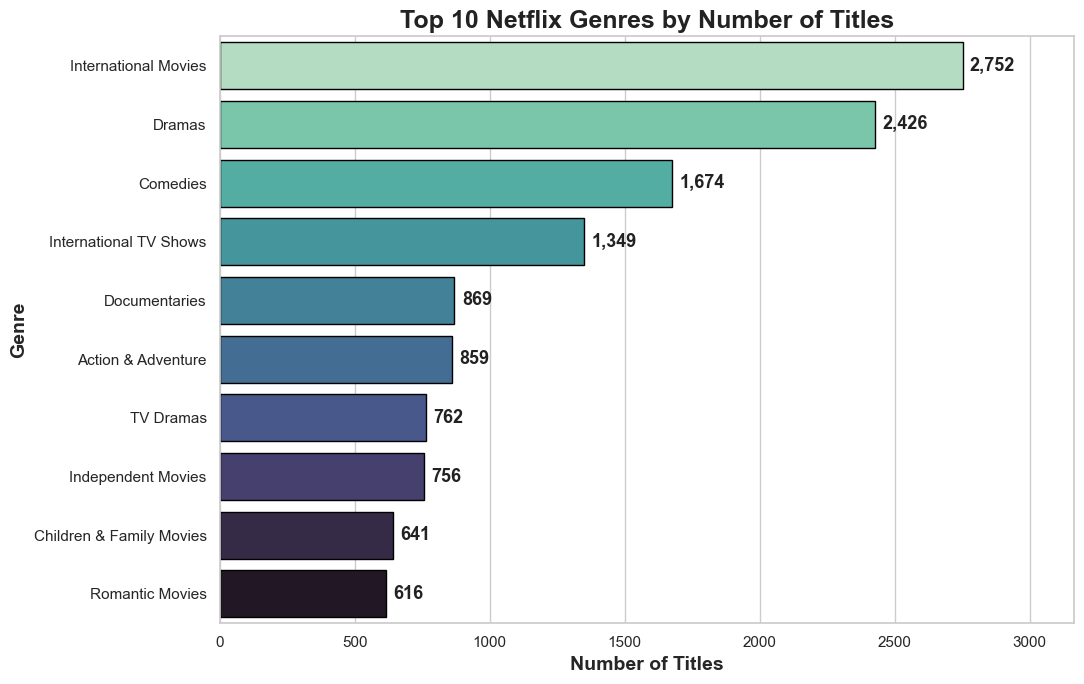

The top genre is 'International Movies' with 2,752 titles, making up 21.7% of the top 10 genres combined. There is a significant difference between the most popular and least popular genres among the top 10. Multiple genres (International Movies, Dramas, Comedies, International TV Shows) contribute significantly to Netflix's catalog, showing content variety.


In [5]:
sns.set_theme(style="whitegrid")  
# Set the Seaborn plotting style to 'whitegrid' which provides a clean white background with gridlines.
# This improves readability of the plots.

# Step 1: Content Type Distribution (Movies vs TV Shows)
plt.figure(figsize=(8, 6))  
# Create a new figure for the plot with width=8 inches and height=6 inches.

# Count the number of occurrences of each unique value in the 'type' column.
# 'type' refers to whether the title is a 'Movie' or 'TV Show'.
type_counts = data['type'].value_counts()

# Choose a color palette from Seaborn with as many colors as unique content types.
colors = sns.color_palette("Set1", n_colors=len(type_counts))

# Create a bar chart:
# - X-axis categories = content types (Movie, TV Show)
# - Heights of bars = number of titles for each type
# - Colors assigned from the palette
# - Edge color black and a little transparency (alpha=0.85)
bars = plt.bar(type_counts.index, type_counts.values, color=colors, edgecolor='black', linewidth=1.2, alpha=0.85)

# Add title and axis labels with specific font sizes, weights and colors for aesthetics and readability
plt.title('Netflix Content Distribution: Movies vs TV Shows', fontsize=18, weight='bold', color='#333333')
plt.xlabel('Content Type', fontsize=14, weight='semibold')
plt.ylabel('Number of Titles', fontsize=14, weight='semibold')

# Set y-axis limit a bit above max count for spacing (115%)
plt.ylim(0, max(type_counts.values)*1.15)

# Add count and percentage labels inside each bar:
# Loop through each bar in the plot
total = type_counts.sum()  # Total number of titles in dataset
for bar in bars:
    height = bar.get_height()  # Height of the current bar
    pct = height / total * 100  # Percentage of this content type out of total
    # Place text at the middle of the bar (x=center, y=height/2)
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-position (middle of the bar)
        height / 2,                         # y-position (middle height of bar)
        f"{height:,}\n({pct:.1f}%)",       # Text showing count and percentage (formatted with commas)
        ha='center',                       # Horizontal alignment center
        va='center',                       # Vertical alignment center
        fontsize=14,
        color='white',                     # White text color for contrast on colored bars
        weight='bold',
        fontfamily='Arial'
    )

plt.tight_layout()  # Adjust layout so labels/title fit well
plt.show()  # Display the bar chart


# Function to generate textual insights about content types dynamically
def generate_type_insight(counts):
    total = counts.sum()  # Total titles
    dominant_type = counts.idxmax()  # Content type with highest count (dominant)
    dominant_count = counts.max()  # Count of dominant content type
    dominant_pct = dominant_count / total * 100  # Percentage of dominant content type
    
    # Other content types excluding the dominant one
    other_types = counts.drop(dominant_type)
    other_total = other_types.sum()  # Total count of other types
    other_pct = other_total / total * 100  # Percentage of other types
    
    # Formatted insight text explaining dominance and distribution
    insight = (
        f"The dataset contains a total of {total:,} titles. "
        f"'{dominant_type}' is the dominant content type, comprising {dominant_count:,} titles "
        f"which is about {dominant_pct:.1f}% of the catalog. "
        f"The remaining {other_total:,} titles ({other_pct:.1f}%) are other types. "
        f"This suggests Netflix primarily offers {dominant_type.lower()} content but maintains a notable "
        f"presence of other types for audience diversity."
    )
    return insight

print(generate_type_insight(type_counts))  # Print the generated insight


# Step 2: Top 10 Genres on Netflix
# The 'listed_in' column contains genre info as comma-separated strings.
# Convert each genre string into a list of genres using .apply() and lambda function.
data['genres'] = data['listed_in'].apply(lambda x: x.split(', '))

# Flatten the list of lists into a single list of all genres across dataset
all_genres = sum(data['genres'], [])

# Count how many times each genre appears and select the top 10 most common genres
genre_counts = pd.Series(all_genres).value_counts().head(10)

plt.figure(figsize=(11, 7))  # Bigger figure for horizontal bar plot of genres

# Select a color palette ('mako_r' is a reversed color ramp from dark to light)
palette = sns.color_palette("mako_r", n_colors=10)

# Create horizontal bar plot with genre counts:
# - X-axis: number of titles
# - Y-axis: genre names
# - Palette colors and black edges for better visuals
bars = sns.barplot(x=genre_counts.values, y=genre_counts.index, palette=palette, edgecolor='black')

# Add title and labels with font customization
plt.title('Top 10 Netflix Genres by Number of Titles', fontsize=18, weight='bold', color='#222222')
plt.xlabel('Number of Titles', fontsize=14, weight='semibold')
plt.ylabel('Genre', fontsize=14, weight='semibold')

# Set x-axis limit with some padding (115%) for spacing after largest bar
plt.xlim(0, genre_counts.values[0]*1.15)

# Add numeric count labels at the end of each horizontal bar for clarity
for i, v in enumerate(genre_counts.values):
    plt.text(v + genre_counts.values[0]*0.01, i, f"{v:,}", color='#222222', fontweight='bold', fontsize=13, va='center')

plt.tight_layout()  # Ensure layout fits well
plt.show()  # Display the bar chart


# Function to generate textual insights about top genres dynamically
def generate_genre_insight(genre_series):
    total = genre_series.sum()  # Total counts of the top 10 genres combined
    top_genre = genre_series.idxmax()  # Most common genre
    top_count = genre_series.max()  # Count of most common genre
    top_pct = top_count / total * 100  # Percentage of most common genre within top 10 genres
    
    insights = [f"The top genre is '{top_genre}' with {top_count:,} titles, making up {top_pct:.1f}% of the top 10 genres combined."]
    
    # Calculate difference between max and min genre counts to check distribution spread
    spread = genre_series.max() - genre_series.min()
    
    # If spread is less than 15% of top count, genres are fairly evenly distributed
    if spread < 0.15 * top_count:
        insights.append("The top genres have a fairly even distribution, indicating diverse popular genres.")
    else:
        # Large spread means some genres dominate more than others
        insights.append("There is a significant difference between the most popular and least popular genres among the top 10.")
    
    # Find genres that individually contribute >=10% of the top 10 genres combined
    major_genres = genre_series[genre_series / total >= 0.1]
    if len(major_genres) > 1:
        # More than one major genre indicates variety in content
        insights.append(f"Multiple genres ({', '.join(major_genres.index)}) contribute significantly to Netflix's catalog, showing content variety.")
    else:
        # Single major genre indicates focus on one genre
        insights.append(f"'{top_genre}' dominates the top genres, highlighting a focused content preference.")
    
    # Join all insight parts into a single string
    return " ".join(insights)

print(generate_genre_insight(genre_counts))  # Print the genre insight

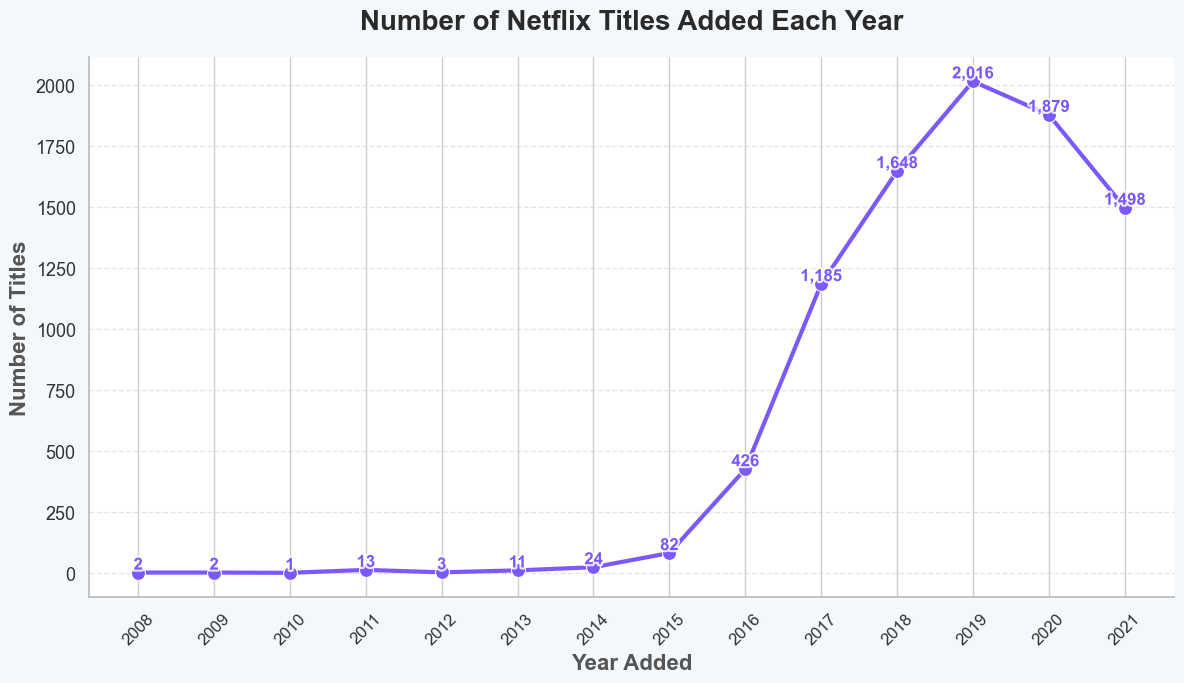

Between 2008 and 2021, a total of 8,790 titles were added to Netflix. The peak year was 2019, with 2,016 titles added — the highest in the dataset. Overall, the number of titles added each year shows a increasing trend, reflecting Netflix's evolving content expansion strategy over time.


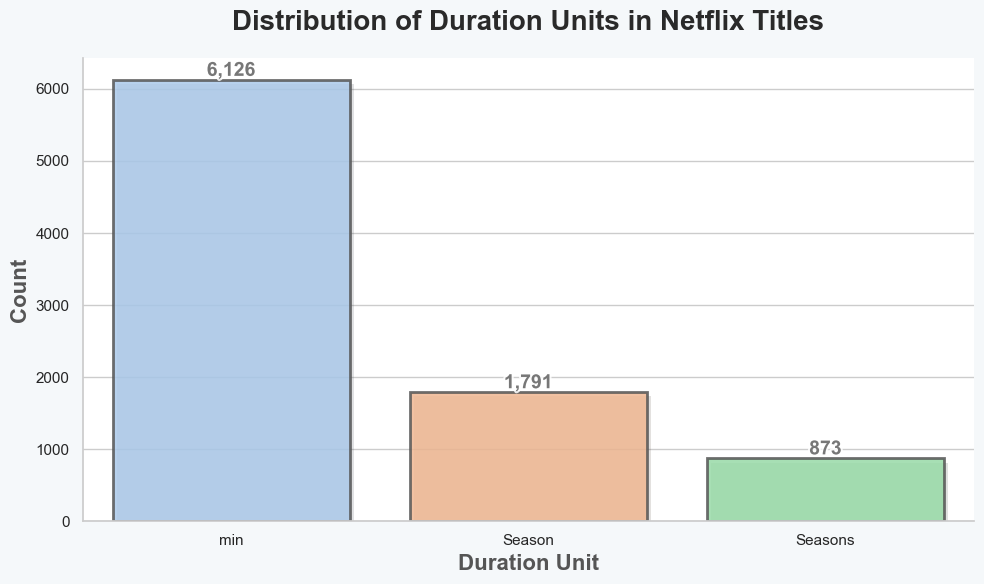

The dataset features 8,790 titles categorized by duration units. The dominant duration unit is 'min', accounting for 6,126 titles or approximately 69.7% of the dataset. Other duration units present include Season, Seasons. This distribution indicates Netflix offers a varied mix of content formats, from movies measured in minutes to series counted by seasons.


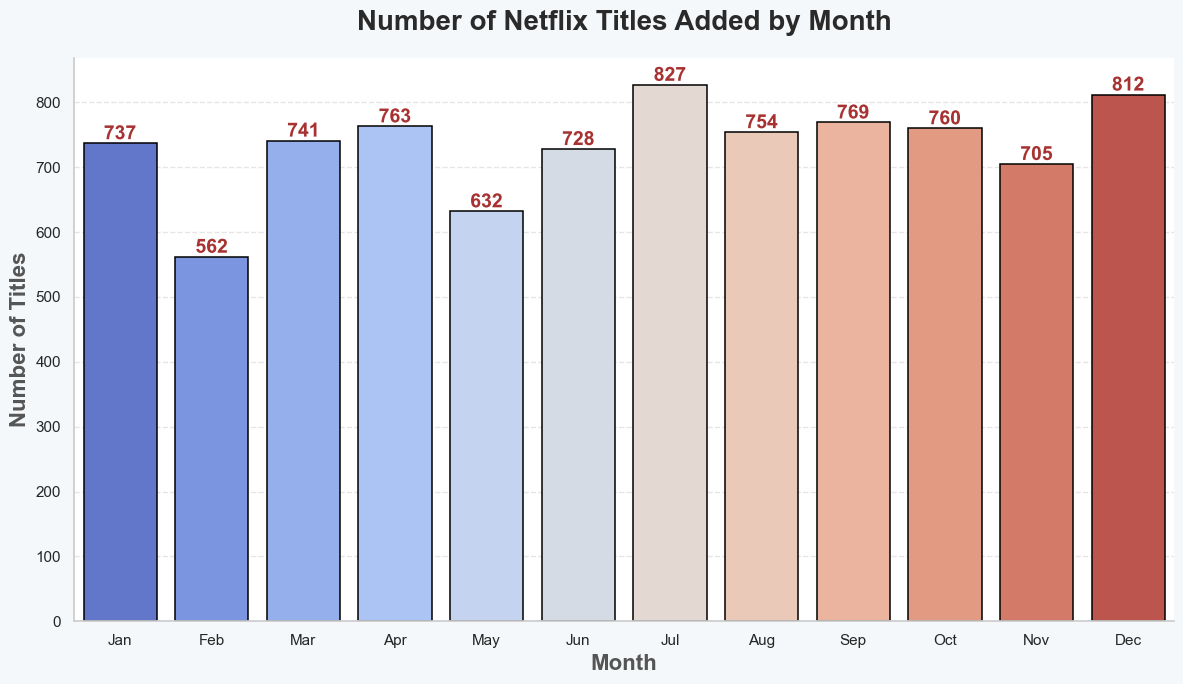

Across all years, Netflix added a total of 8,790 titles distributed unevenly across months. The month with the highest additions is Jul, with 827 titles, while the lowest month is Feb, with only 562 titles. This suggests possible seasonal strategies or content release patterns focused around certain times of the year.


In [6]:
sns.set_style("whitegrid")  # Set seaborn style to 'whitegrid' for all plots

# Function to add glowing text labels on plots for better visibility and style
def add_glowing_text(ax, x, y, text, fontsize=14, color='black', weight='bold', ha='center', va='center'):
    """
    Adds text to the axes 'ax' at position (x,y) with a glowing stroke effect.
    This improves readability on colored or complex backgrounds.
    """
    txt = ax.text(x, y, text, fontsize=fontsize, fontweight=weight, color=color, ha=ha, va=va)
    # Add white glow around the text using path effects
    txt.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='white', alpha=0.85)])
    return txt

# --- Step 3a: Plot Number of Titles Added Each Year (Line Plot) ---

plt.figure(figsize=(12,7), facecolor='#f5f8fa')  # Create figure with custom size and light background color
ax = plt.gca()  # Get current axes

# Count number of titles added per year, then sort by year ascending
year_counts = data['year_added'].value_counts().sort_index()
x = year_counts.index  # Years
y = year_counts.values  # Counts per year

# Plot line graph with circular markers, custom color, width, and size
sns.lineplot(x=x, y=y, marker='o', color='#7b59ff', linewidth=3, markersize=10, ax=ax)

# Set the main title and axis labels with font styling and padding
ax.set_title('Number of Netflix Titles Added Each Year', fontsize=20, fontweight='bold', color='#2a2a2a', pad=20)
ax.set_xlabel('Year Added', fontsize=16, fontweight='semibold', color='#555555')
ax.set_ylabel('Number of Titles', fontsize=16, fontweight='semibold', color='#555555')

# Customize x-axis ticks and labels: rotate 45 degrees for readability
ax.set_xticks(x)
ax.set_xticklabels(x, rotation=45, fontsize=12, color='#333333')

# Customize y-axis tick label size and color
ax.tick_params(axis='y', labelsize=13, colors='#333333')

# Style plot borders (spines)
ax.spines['top'].set_visible(False)  # Hide top border
ax.spines['right'].set_visible(False)  # Hide right border
ax.spines['left'].set_color('#bbbbbb')  # Light grey left border
ax.spines['bottom'].set_color('#bbbbbb')  # Light grey bottom border

# Add horizontal grid lines for y-axis for easier reading of values
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add glowing text labels above each data point to display exact counts
for xi, yi in zip(x, y):
    add_glowing_text(ax, xi, yi, f"{yi:,}", fontsize=12, color='#7b59ff', weight='bold', va='bottom')

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


# Insight generator for Step 3a: Summarizes yearly additions info
def insight_year_added(year_counts):
    total = year_counts.sum()  # Total titles added across all years
    peak_year = year_counts.idxmax()  # Year with maximum titles added
    peak_val = year_counts.max()  # Maximum count in peak year
    earliest = year_counts.index.min()  # Earliest year in dataset
    latest = year_counts.index.max()  # Latest year in dataset

    # Check if the trend is generally increasing or not (compare last to first year counts)
    trend = "increasing" if year_counts.iloc[-1] > year_counts.iloc[0] else "decreasing or fluctuating"

    insight = (f"Between {earliest} and {latest}, a total of {total:,} titles were added to Netflix. "
               f"The peak year was {peak_year}, with {peak_val:,} titles added — the highest in the dataset. "
               f"Overall, the number of titles added each year shows a {trend} trend, "
               f"reflecting Netflix's evolving content expansion strategy over time.")
    return insight

print(insight_year_added(year_counts))


# --- Step 3b: Distribution of Duration Units (Bar Plot) ---

plt.figure(figsize=(10,6), facecolor='#f5f8fa')  # Set figure size and background color
ax = plt.gca()

# Count occurrences of each unique duration unit (e.g., 'min', 'seasons')
duration_counts = data['duration_unit'].value_counts()

# Plot a pastel colored bar plot with gray borders
bars = sns.barplot(x=duration_counts.index, y=duration_counts.values,
                   palette='pastel', edgecolor='gray', linewidth=1.2, ax=ax)

# Titles and axis labels with custom font sizes and colors
ax.set_title('Distribution of Duration Units in Netflix Titles', fontsize=20, fontweight='bold', color='#2a2a2a', pad=20)
ax.set_xlabel('Duration Unit', fontsize=16, fontweight='semibold', color='#555555')
ax.set_ylabel('Count', fontsize=16, fontweight='semibold', color='#555555')

# Clean look by hiding top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add subtle shadow effect to each bar for 3D look
for bar in bars.patches:
    bar.set_alpha(0.85)
    bar.set_linewidth(2)
    bar.set_edgecolor('#555555')
    bar.set_path_effects([PathEffects.withSimplePatchShadow(offset=(3,-3), alpha=0.15)])

# Add glowing count labels on top of each bar for clarity
for bar in bars.patches:
    height = bar.get_height()
    x_pos = bar.get_x() + bar.get_width() / 2
    add_glowing_text(ax, x_pos, height, f"{int(height):,}", fontsize=14, color='#777777', weight='bold', va='bottom')

plt.tight_layout()
plt.show()


# Insight generator for Step 3b: Summary of duration unit distribution
def insight_duration_unit(duration_counts):
    total = duration_counts.sum()  # Total titles counted by duration unit
    dominant = duration_counts.idxmax()  # Most frequent duration unit
    dominant_count = duration_counts.max()  # Count of dominant unit
    dominant_pct = dominant_count / total * 100  # Percentage of dominant unit
    categories = duration_counts.index.tolist()  # List of all duration units

    insight = (f"The dataset features {total:,} titles categorized by duration units. "
               f"The dominant duration unit is '{dominant}', accounting for {dominant_count:,} titles "
               f"or approximately {dominant_pct:.1f}% of the dataset. "
               f"Other duration units present include {', '.join([c for c in categories if c != dominant])}. "
               f"This distribution indicates Netflix offers a varied mix of content formats, from movies measured in minutes to series counted by seasons.")
    return insight

print(insight_duration_unit(duration_counts))


# --- Step 3c: Titles Added by Month (Horizontal Bar Plot) ---

plt.figure(figsize=(12,7), facecolor='#f5f8fa')  # Figure size and background color
ax = plt.gca()

# Define the order and labels of months (1 to 12)
month_order = list(range(1, 13))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Count number of titles added per month; reindex to include all months (fill missing with 0)
month_counts = data['month_added'].value_counts().reindex(month_order).fillna(0)

# Plot a barplot with month names on x-axis, counts on y-axis, coolwarm color palette, and black edges
bars = sns.barplot(x=month_names, y=month_counts.values, palette='coolwarm', edgecolor='black', linewidth=1.1, ax=ax)

# Titles and axis labels with font styling
ax.set_title('Number of Netflix Titles Added by Month', fontsize=20, fontweight='bold', color='#2a2a2a', pad=20)
ax.set_xlabel('Month', fontsize=16, fontweight='semibold', color='#555555')
ax.set_ylabel('Number of Titles', fontsize=16, fontweight='semibold', color='#555555')

# Remove top and right spines for neatness
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add glowing count labels on top of each bar for clarity and style
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    x_pos = bar.get_x() + bar.get_width() / 2
    add_glowing_text(ax, i, height, f"{int(height):,}", fontsize=14, color='#a83232', weight='bold', va='bottom')

# Add horizontal grid lines on y-axis to help read values
ax.yaxis.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


# Insight generator for Step 3c: Summarizes monthly additions
def insight_month_added(month_counts):
    total = month_counts.sum()  # Total titles added across all months (all years combined)
    peak_month_num = month_counts.idxmax()  # Numeric month with max titles added
    peak_month_name = month_names[peak_month_num-1]  # Convert number to month name
    peak_val = month_counts.max()  # Max titles count in peak month
    low_month_num = month_counts.idxmin()  # Month with lowest additions
    low_month_name = month_names[low_month_num-1]
    low_val = month_counts.min()  # Min titles count in low month

    insight = (f"Across all years, Netflix added a total of {total:,} titles distributed unevenly across months. "
               f"The month with the highest additions is {peak_month_name}, with {peak_val:,} titles, "
               f"while the lowest month is {low_month_name}, with only {low_val:,} titles. "
               f"This suggests possible seasonal strategies or content release patterns focused around certain times of the year.")
    return insight

print(insight_month_added(month_counts))

In [7]:
# Calculate the age of content as of 2021
data['content_age'] = 2021 - data['release_year']

# Count the number of genres assigned to each title
data['num_genres'] = data['listed_in'].apply(lambda x: len(x.split(', ')) if pd.notnull(x) else 0)

# Create a binary column indicating whether the title is a movie (1) or not (0)
data['is_movie'] = data['type'].apply(lambda x: 1 if x == 'Movie' else 0)

# Prepare a preview DataFrame with selected columns
preview = data[['title', 'release_year', 'content_age', 'listed_in', 'num_genres', 'type', 'is_movie']].head(10).copy()
preview.index = range(1, len(preview) + 1)

# Rename columns for better readability
preview.rename(columns={
    'title': 'Title',
    'release_year': 'Release Year',
    'content_age': 'Content Age (2021)',
    'listed_in': 'Genres',
    'num_genres': 'Number of Genres',
    'type': 'Type',
    'is_movie': 'Is Movie'
}, inplace=True)

# Style the preview table
styled_preview = preview.style.set_table_styles([
    {
        'selector': 'caption',
        'props': [
            ('caption-side', 'top'),
            ('font-size', '16pt'),
            ('font-weight', 'bold'),
            ('text-align', 'center'),
            ('margin-bottom', '10px')
        ]
    },
    {
        'selector': 'thead th',
        'props': [
            ('background-color', '#f0f0f0'),
            ('color', '#000000'),
            ('font-weight', 'bold'),
            ('font-size', '11pt'),
            ('text-align', 'center'),
            ('padding', '10px'),
            ('border-bottom', '2px solid #ccc')
        ]
    },
    {
        'selector': 'tbody td',
        'props': [
            ('background-color', '#ffffff'),
            ('color', '#333333'),
            ('font-size', '11pt'),
            ('text-align', 'center'),
            ('padding', '8px'),
            ('border-bottom', '1px solid #eee')
        ]
    },
    {
        'selector': 'tbody tr:nth-child(even)',
        'props': [('background-color', '#f9f9f9')]
    },
    {
        'selector': 'tbody tr:hover',
        'props': [
            ('background-color', '#d1e7fd'),
            ('cursor', 'pointer'),
            ('transition', 'background-color 0.2s ease')
        ]
    }
]).set_caption("Netflix Content Age and Genre Analysis Preview")

display(styled_preview)

,Title,Release Year,Content Age (2021),Genres,Number of Genres,Type,Is Movie
1,Dick Johnson Is Dead,2020,1,Documentaries,1,Movie,1
2,Ganglands,2021,0,"Crime TV Shows, International TV Shows, TV Action & Adventure",3,TV Show,0
3,Midnight Mass,2021,0,"TV Dramas, TV Horror, TV Mysteries",3,TV Show,0
4,Confessions of an Invisible Girl,2021,0,"Children & Family Movies, Comedies",2,Movie,1
5,Sankofa,1993,28,"Dramas, Independent Movies, International Movies",3,Movie,1
6,The Great British Baking Show,2021,0,"British TV Shows, Reality TV",2,TV Show,0
7,The Starling,2021,0,"Comedies, Dramas",2,Movie,1
8,Motu Patlu in the Game of Zones,2019,2,"Children & Family Movies, Comedies, Music & Musicals",3,Movie,1
9,Je Suis Karl,2021,0,"Dramas, International Movies",2,Movie,1
10,Motu Patlu in Wonderland,2013,8,"Children & Family Movies, Music & Musicals",2,Movie,1


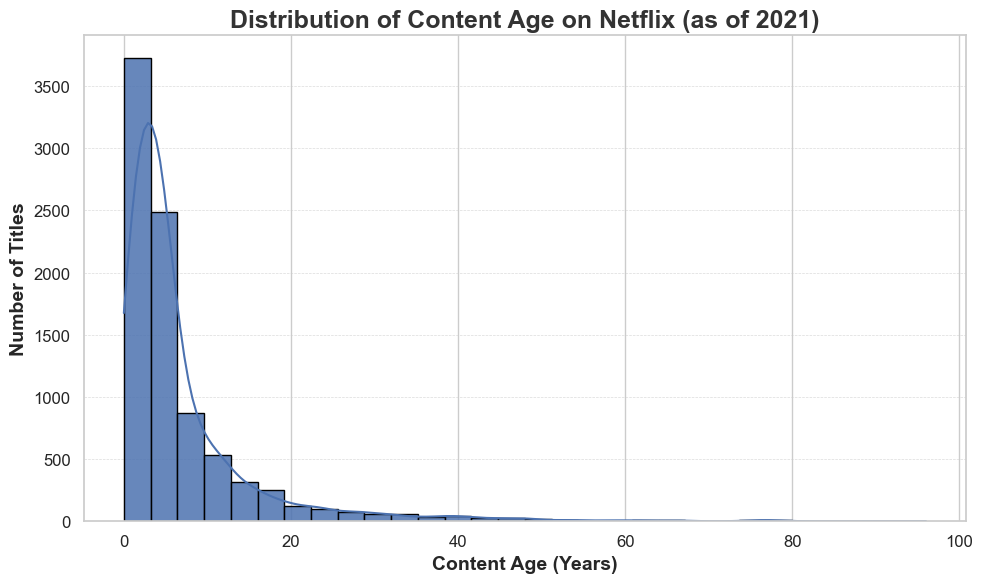

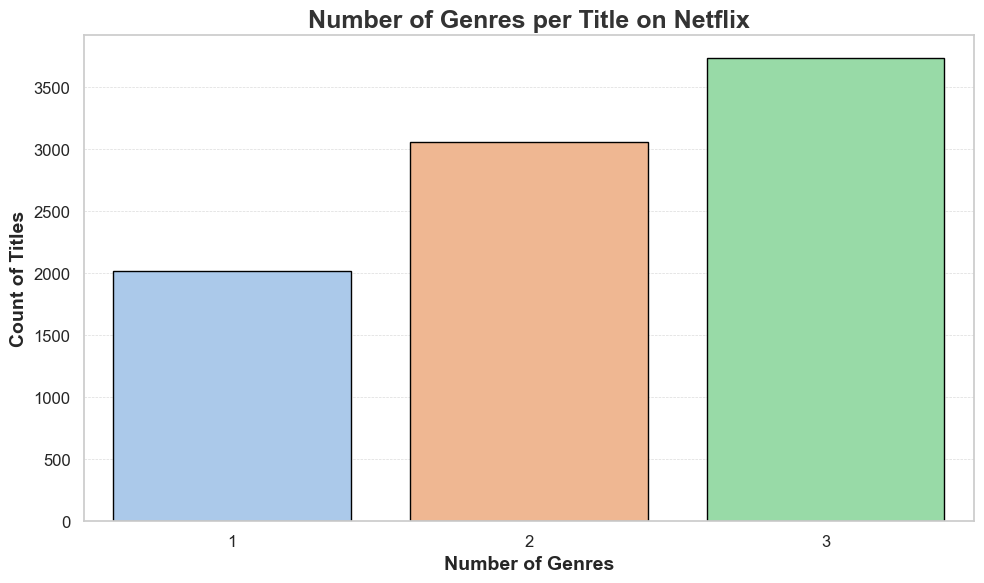

The average content age is approximately 6.8 years, with a median of 4 years. The oldest content is 96 years old while the newest is 0 years. This distribution indicates that Netflix hosts a mix of both recent and older titles, providing a balanced content library.
On average, a title falls into 2.2 genres. The most genre-diverse title is listed under 3 genres. Most titles (3,726) are categorized under 3 genre(s), suggesting a trend toward focused thematic classification.


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a consistent visual theme for all plots with white background and grid
sns.set_theme(style="whitegrid")

# --- Step 1: Distribution of Content Age (Histogram with KDE) ---
plt.figure(figsize=(10, 6))  # Set plot size
hist_color = "#4c72b0"       # Choose a nice blue color for the histogram

# Plot histogram with KDE (Kernel Density Estimate) to show content age distribution
sns.histplot(
    data['content_age'],      # Data for histogram
    bins=30,                 # Number of bins for age groups
    kde=True,                # Add smooth KDE line on top of histogram
    color=hist_color,        # Bar color
    edgecolor='black',       # Bar edges color for clarity
    alpha=0.85               # Transparency for better aesthetics
)

# Titles and axis labels with readable font sizes and weights
plt.title("Distribution of Content Age on Netflix (as of 2021)", fontsize=18, weight='bold', color="#333333")
plt.xlabel("Content Age (Years)", fontsize=14, weight='semibold')
plt.ylabel("Number of Titles", fontsize=14, weight='semibold')

# Font sizes for ticks to improve readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add horizontal grid lines on y-axis for better visual alignment
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()          # Display the plot


# --- Step 2: Distribution of Number of Genres per Title (Count Plot) ---
plt.figure(figsize=(10, 6))  # Plot size
palette = sns.color_palette("pastel")  # Soft colors for bars

# Countplot automatically counts occurrences of each genre count
sns.countplot(
    data=data, 
    x='num_genres',           # X-axis: Number of genres
    palette=palette,          # Pastel color scheme
    edgecolor='black'         # Black borders around bars for better separation
)

# Titles and axis labels with proper font styling
plt.title("Number of Genres per Title on Netflix", fontsize=18, weight='bold', color="#333333")
plt.xlabel("Number of Genres", fontsize=14, weight='semibold')
plt.ylabel("Count of Titles", fontsize=14, weight='semibold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)  # Horizontal grid lines

plt.tight_layout()
plt.show()


# --- Step 3: Generate textual insights from data ---

def generate_content_age_insight(content_age_series):
    """
    Summarizes content age distribution by calculating
    mean, median, oldest and newest content age.
    """
    avg_age = content_age_series.mean()
    median_age = content_age_series.median()
    oldest = content_age_series.max()
    newest = content_age_series.min()
    
    insight = (
        f"The average content age is approximately {avg_age:.1f} years, "
        f"with a median of {median_age:.0f} years. "
        f"The oldest content is {oldest} years old while the newest is {newest} years. "
        f"This distribution indicates that Netflix hosts a mix of both recent and older titles, "
        f"providing a balanced content library."
    )
    return insight


def generate_genre_count_insight(num_genres_series):
    """
    Provides insight on the number of genres per title,
    including average, maximum, and most frequent genre counts.
    """
    avg_genres = num_genres_series.mean()
    max_genres = num_genres_series.max()
    most_common = num_genres_series.value_counts().idxmax()
    mode_count = num_genres_series.value_counts().max()
    
    insight = (
        f"On average, a title falls into {avg_genres:.1f} genres. "
        f"The most genre-diverse title is listed under {max_genres} genres. "
        f"Most titles ({mode_count:,}) are categorized under {most_common} genre(s), "
        f"suggesting a trend toward focused thematic classification."
    )
    return insight


# Print the generated insights
print(generate_content_age_insight(data['content_age']))
print(generate_genre_count_insight(data['num_genres']))

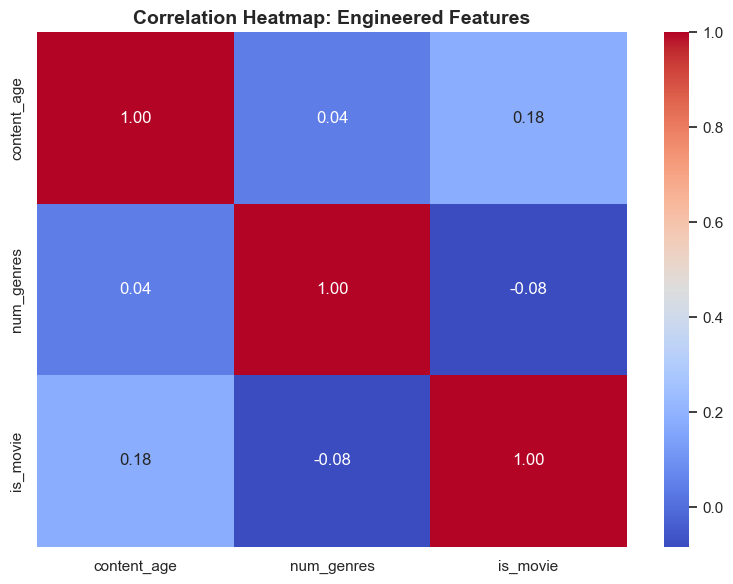

In [9]:
# Set the figure size to 8x6 inches for a clear view
plt.figure(figsize=(8, 6))

# Select the features to correlate and plot the heatmap
# 'annot=True' adds the correlation coefficient values on the heatmap
# 'cmap="coolwarm"' applies a diverging color palette showing positive/negative correlations
# 'fmt=".2f"' formats the annotation to 2 decimal places
sns.heatmap(data[['content_age', 'num_genres', 'is_movie']].corr(),
            annot=True,
            cmap="coolwarm",
            fmt=".2f")

# Add a descriptive title with font size and weight for emphasis
plt.title("Correlation Heatmap: Engineered Features", fontsize=14, weight='bold')

# Adjust layout so title and labels don't get cut off
plt.tight_layout()

# Display the heatmap plot
plt.show()

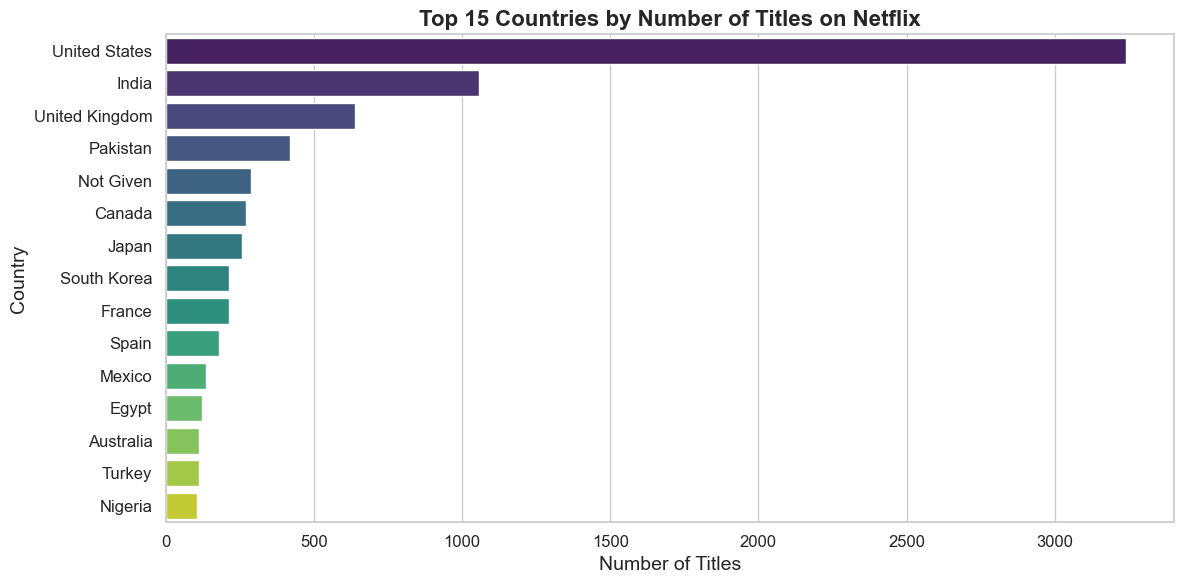

In [10]:
# Step 1: Handle missing values in 'country' column by replacing NaN with 'Unknown'
data['country'] = data['country'].fillna('Unknown')

# Step 2: Extract primary country by splitting multiple countries and taking the first
data['primary_country'] = data['country'].apply(lambda x: x.split(',')[0].strip() if x != 'Unknown' else 'Unknown')

# Step 3: Count the number of titles per primary country and select top 15
top_countries = data['primary_country'].value_counts().head(15)

# Step 4: Plot a horizontal bar chart of top countries
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')

plt.title('Top 15 Countries by Number of Titles on Netflix', fontsize=16, weight='bold')
plt.xlabel('Number of Titles', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

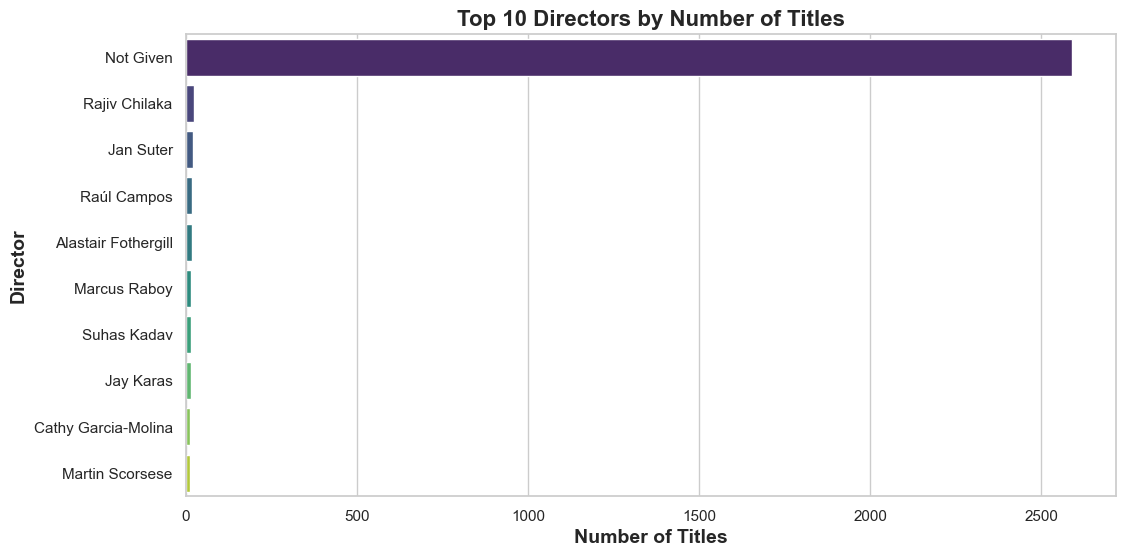

In [11]:
# Extract the 'director' column, drop missing values, split multiple directors by comma, then explode into separate rows
director = data['director'].dropna().str.split(', ').explode()

# Count the occurrences of each director and take the top 10 most frequent ones
top_directors = director.value_counts().head(10)

# Set the figure size for better readability
plt.figure(figsize=(12,6))

# Create a horizontal bar plot with the counts of the top 10 directors
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')

# Set plot title and axis labels with appropriate descriptions
plt.title('Top 10 Directors by Number of Titles', fontsize=16, fontweight='bold')
plt.xlabel('Number of Titles', fontsize=14, fontweight='semibold')
plt.ylabel('Director', fontsize=14, fontweight='semibold')

# Show the plot
plt.show()

In [12]:
# Netflix Data Analysis Project using PostgreSQL and Python

# These are your PostgreSQL credentials and database details
username = 'xyz'                     # Username to access PostgreSQL
password = 'abc'                 # Password for the PostgreSQL user
host = 'localhost'                        # Server where PostgreSQL is hosted (localhost = same machine)
port = 'xxxx'                             # Default PostgreSQL port
database = 'watchdecodenetflixcodes'     # Name of the PostgreSQL database containing Netflix data

# Creating a connection string in the format expected by SQLAlchemy
conn_string = f"postgresql://{username}:{password}@{host}:{port}/{database}"

# Create an SQLAlchemy engine that allows pandas to communicate with PostgreSQL
engine = create_engine(conn_string)

# Top 10 genres by number of titles
query_genres = """
SELECT listed_in AS genre, COUNT(*) AS count
FROM netflix_data
GROUP BY listed_in
ORDER BY count DESC
LIMIT 10;
"""

# Movies released after 2015 with duration greater than 90 minutes
query_movies_runtime = """
SELECT title, release_year, duration
FROM netflix_data
WHERE release_year > 2015
  AND CAST(SUBSTRING(duration FROM '(\d+)') AS INTEGER) > 90  -- Extracts numeric part and checks > 90
  AND duration ~ '^\d+'                                       -- Ensures duration starts with digits
ORDER BY release_year DESC;
"""

# Titles added in December 2020
query_december_2020 = """
SELECT title, date_added
FROM netflix_data
WHERE TO_DATE(date_added, 'MM/DD/YYYY') BETWEEN DATE '2020-12-01' AND DATE '2020-12-31'
ORDER BY TO_DATE(date_added, 'MM/DD/YYYY');
"""

# Directors with more than 10 titles listed on Netflix
query_directors = """
SELECT director, COUNT(*) AS title_count
FROM netflix_data
WHERE director IS NOT NULL AND director != 'Not Given'
GROUP BY director
HAVING COUNT(*) > 10
ORDER BY title_count DESC;
"""

# Top 10 countries with the highest number of Netflix titles
query_countries = """
SELECT country, COUNT(*) AS count
FROM netflix_data
WHERE country IS NOT NULL
GROUP BY country
ORDER BY count DESC
LIMIT 10;
"""

# Number of Movies vs TV Shows
query_type_counts = """
SELECT type, COUNT(*) AS count
FROM netflix_data
GROUP BY type;
"""

# Average duration of movies in minutes
query_avg_duration = """
SELECT AVG(CAST(SUBSTRING(duration FROM '(\d+)') AS INTEGER)) AS avg_movie_duration
FROM netflix_data
WHERE type = 'Movie' AND duration ~ '^\d+';
"""

# Number of titles added per year (based on 'date_added')
query_titles_by_year = """
SELECT EXTRACT(YEAR FROM TO_DATE(date_added, 'MM/DD/YYYY')) AS year,
       COUNT(*) AS count
FROM netflix_data
WHERE date_added IS NOT NULL
GROUP BY year
ORDER BY year;
"""

# Using pandas to execute each SQL query and store results into DataFrames
df_genres = pd.read_sql(query_genres, engine)                       # Top 10 genres
df_movies_after_2015 = pd.read_sql(query_movies_runtime, engine)   # Movies >90 mins after 2015
df_december_2020 = pd.read_sql(query_december_2020, engine)        # Titles added in Dec 2020
df_directors_over_10 = pd.read_sql(query_directors, engine)        # Directors with >10 titles
df_countries = pd.read_sql(query_countries, engine)                # Top 10 countries
df_type_counts = pd.read_sql(query_type_counts, engine)            # Type distribution (Movie/TV Show)
df_avg_duration = pd.read_sql(query_avg_duration, engine)          # Average movie duration
df_titles_by_year = pd.read_sql(query_titles_by_year, engine)      # Titles per year

# Print top 10 genres with counts
print("Top 10 Most Frequent Genres:\n")
print(tabulate(df_genres, headers='keys', tablefmt='fancy_grid', showindex=False), "\n")

# Print sample of movies released after 2015 and longer than 90 minutes
print("Movies after 2015 with runtime > 90 mins:\n")
print(tabulate(df_movies_after_2015.head(), headers='keys', tablefmt='fancy_grid', showindex=False), "\n")

# Print titles added in December 2020
print("Titles added in December 2020:\n")
print(tabulate(df_december_2020, headers='keys', tablefmt='fancy_grid', showindex=False), "\n")

# Print top directors with more than 10 titles
print("Directors with more than 10 titles:\n")
print(tabulate(df_directors_over_10.head(), headers='keys', tablefmt='fancy_grid', showindex=False), "\n")

# Print countries with most Netflix titles
print("Top 10 Countries with Most Titles:\n")
print(tabulate(df_countries, headers='keys', tablefmt='fancy_grid', showindex=False), "\n")

# Print content type distribution
print("Content Type Counts:\n")
print(tabulate(df_type_counts, headers='keys', tablefmt='fancy_grid', showindex=False), "\n")

# Print average movie duration
print("Average Movie Duration:\n")
print(tabulate(df_avg_duration, headers='keys', tablefmt='fancy_grid', showindex=False), "\n")

# Print number of titles added per year (last few years shown)
print("Titles Added per Year:\n")
print(tabulate(df_titles_by_year.tail(), headers='keys', tablefmt='fancy_grid', showindex=False), "\n")

Top 10 Most Frequent Genres:

╒══════════════════════════════════════════════════╤═════════╕
│ genre                                            │   count │
╞══════════════════════════════════════════════════╪═════════╡
│ Dramas, International Movies                     │     362 │
├──────────────────────────────────────────────────┼─────────┤
│ Documentaries                                    │     359 │
├──────────────────────────────────────────────────┼─────────┤
│ Stand-Up Comedy                                  │     334 │
├──────────────────────────────────────────────────┼─────────┤
│ Comedies, Dramas, International Movies           │     274 │
├──────────────────────────────────────────────────┼─────────┤
│ Dramas, Independent Movies, International Movies │     252 │
├──────────────────────────────────────────────────┼─────────┤
│ Kids' TV                                         │     219 │
├──────────────────────────────────────────────────┼─────────┤
│ Children & Family Movie

In [13]:
# Feature Engineering and Classification Modeling on Netflix Dataset

# Create new feature: length of each title string
data['title_length'] = data['title'].apply(lambda x: len(str(x)))  # Ensures title is treated as a string

# Handle missing values in 'duration_num' by filling them with the median value
data['duration_num'] = data['duration_num'].fillna(data['duration_num'].median())

# Create a new feature: number of genres associated with each title
data['num_genres'] = data['listed_in'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)

# Define the input feature columns and the target label column
features = ['title_length', 'duration_num', 'num_genres']
target = 'type'  # Target is categorical: either 'Movie' or 'TV Show'

# Extract the features (X) and target (y) from the dataset
X = data[features].copy()
y = data[target].copy()

# Encode the categorical target variable into numerical values
# For example: 'Movie' becomes 0 and 'TV Show' becomes 1
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.25, random_state=42
)

# Function to train a model and evaluate its performance
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Evaluate performance using standard classification metrics
    metrics = [
        ["Accuracy",  accuracy_score(y_test, y_pred)],
        ["Precision", precision_score(y_test, y_pred)],
        ["Recall",    recall_score(y_test, y_pred)],
        ["F1 Score",  f1_score(y_test, y_pred)]
    ]
    
    # Print basic metric scores
    print(f"\nModel: {model.__class__.__name__}\n")
    print(tabulate(metrics, headers=["Metric", "Score"], tablefmt="grid", floatfmt=".4f"))
    
    # Generate a detailed classification report (per class)
    report_dict = classification_report(
        y_test, y_pred, target_names=le.classes_, output_dict=True
    )
    df_report = pd.DataFrame(report_dict).T.round(4)
    
    print("\nClassification Report:\n")
    print(tabulate(df_report, headers='keys', tablefmt='grid'))
    print("=" * 60)

# Initialize different classifiers for comparison
log_reg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
naive_bayes = GaussianNB()

# Train and evaluate each model using the defined function
for model in [log_reg, decision_tree, random_forest, naive_bayes]:
    train_evaluate_model(model, X_train, X_test, y_train, y_test)


Model: LogisticRegression

+-----------+---------+
| Metric    |   Score |
+===========+=========+
| Accuracy  |  0.9973 |
+-----------+---------+
| Precision |  0.9939 |
+-----------+---------+
| Recall    |  0.9969 |
+-----------+---------+
| F1 Score  |  0.9954 |
+-----------+---------+

Classification Report:

+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
+==============+=============+==========+============+===========+
| Movie        |      0.9987 |   0.9974 |     0.9981 | 1544      |
+--------------+-------------+----------+------------+-----------+
| TV Show      |      0.9939 |   0.9969 |     0.9954 |  654      |
+--------------+-------------+----------+------------+-----------+
| accuracy     |      0.9973 |   0.9973 |     0.9973 |    0.9973 |
+--------------+-------------+----------+------------+-----------+
| macro avg    |      0.9963 |   0.9972 |     0.9967 | 2198      |
+------------


Class Distribution:
type
Movie      6126
TV Show    2664
Name: count, dtype: int64

Class Ratio (Movie:TV Show): 2.30:1


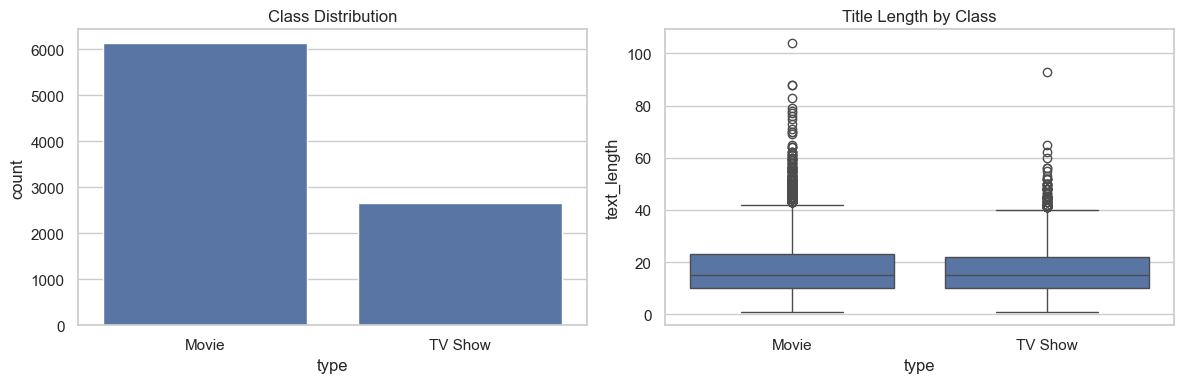

Epoch 1/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - accuracy: 0.6803 - loss: 1.0101 - val_accuracy: 0.7110 - val_loss: 0.8571 - learning_rate: 5.0000e-04
Epoch 2/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.7847 - loss: 0.7219 - val_accuracy: 0.7838 - val_loss: 0.6890 - learning_rate: 5.0000e-04
Epoch 3/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.8363 - loss: 0.5428 - val_accuracy: 0.7958 - val_loss: 0.5989 - learning_rate: 5.0000e-04
Epoch 4/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.8906 - loss: 0.3858 - val_accuracy: 0.7810 - val_loss: 0.5710 - learning_rate: 5.0000e-04
Epoch 5/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.9174 - loss: 0.2860 - val_accuracy: 0.7725 - val_loss: 0.6023 - learning_rate: 5.0000e-04
Epoch 6/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.9332 - loss: 0.2410 - val_accuracy: 0.7184 - val_loss: 0.7922 - learning_rate: 5.0000e-04
Epoch 7/30
109/110 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - ac

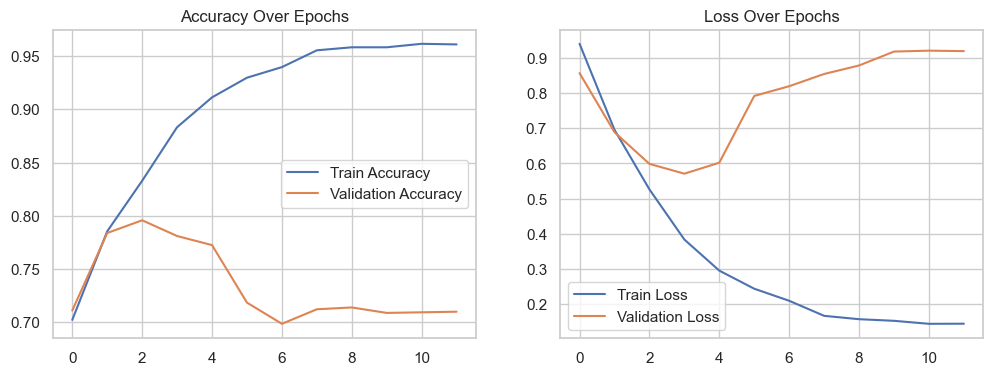

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step


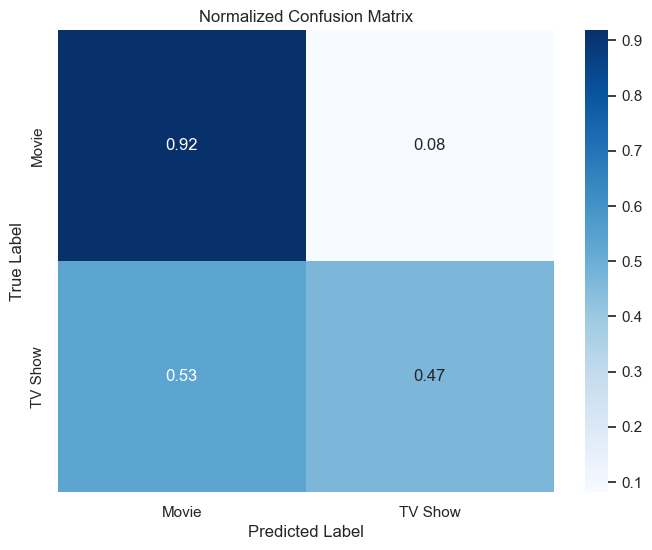

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

Sample Predictions with Error Analysis:
Breaking Bad season 1 episode 1     → Movie    ✗ (should be TV Show) (Confidence: 92.33%)
The Crown: The Complete Series      → TV Show  ✓ (Confidence: 83.22%)
Dangal (2016 film)                  → Movie    ✓ (Confidence: 92.51%)
Our Planet: Documentary Series      → TV Show  ✓ (Confidence: 83.26%)
Avengers: Endgame                   → TV Show  ✗ (should be Movie) (Confidence: 83.73%)
Stranger Things Season 3            → Movie    ✗ (should be TV Show) (Confidence: 88.20%)
The Shawshank Redemption            → TV Show  ✗ (should be Movie) (Confidence: 78.38%)
Friends: The Reunion                → TV Show  ✗ (should be Movie) (Confidence: 63.28%)
Game of Thrones Season 8            → TV Show  ✓ (Confidence: 86.71%)
Inception (2010 movie)              → TV Show  ✗ (should be Movie) (Confidence: 50.33%)
The Mandalorian Chapter 16          → TV Show  ✓ (Confidence: 65.24%)
Titanic 1997 film                   → T

In [14]:
# LSTM Classifier with Better Generalization

# Display distribution of content types (Movies vs TV Shows)
class_dist = data['type'].value_counts()
print("\nClass Distribution:")
print(class_dist)

# Print the class ratio for imbalance insight
print(f"\nClass Ratio (Movie:TV Show): {class_dist[0]/class_dist[1]:.2f}:1")

# Visualize class counts and title lengths
plt.figure(figsize=(12, 4))

# Barplot for number of movies and TV shows
plt.subplot(1, 2, 1)
sns.countplot(x='type', data=data)
plt.title('Class Distribution')

# Compute length of each title string
data['text_length'] = data['title'].apply(len)

# Boxplot to compare title lengths between Movies and TV Shows
plt.subplot(1, 2, 2)
sns.boxplot(x='type', y='text_length', data=data)
plt.title('Title Length by Class')

plt.tight_layout()
plt.show()

# Extract the title text and labels
texts = data['title'].values
labels = data['type'].values

# Preprocessing function to add hints for TV Shows
def enhance_text(text):
    text = text.lower()
    if 'season' in text or 'episode' in text or 'series' in text:
        text += ' tvshow'
    return text

# Apply enhancement to all titles
texts = np.array([enhance_text(t) for t in texts])

# Convert categorical labels to numeric values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Define maximum vocabulary size and maximum sequence length
max_words = 8000
max_len = 25

# Tokenize the enhanced text data
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

# Convert text to padded sequences of integers
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Split the data into training and validation sets using stratification
X_train, X_val, y_train, y_val = train_test_split(
    padded_sequences,
    labels_encoded,
    test_size=0.2,
    stratify=labels_encoded,
    random_state=42
)

# Set embedding dimension for word vectors
embedding_dim = 100

# Define the LSTM-based deep learning model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    BatchNormalization(),
    LSTM(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.3),
    LSTM(32),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')  # Final output layer with softmax
])

# Use Adam optimizer with a low learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

# Compile the model with appropriate loss and evaluation metric
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

# Early stopping to avoid overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True,
    min_delta=0.0001,
    verbose=1
)

# Learning rate scheduler to reduce LR if validation loss stalls
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# Train the model on the training data and validate on the validation set
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))

# Accuracy over epochs
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

# Loss over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.show()

# Predict class labels for validation set
y_pred = np.argmax(model.predict(X_val), axis=1)

# Generate normalized confusion matrix
cm = confusion_matrix(y_val, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_normalized,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.title('Normalized Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Sample titles for prediction testing
sample_titles = [
    "Breaking Bad season 1 episode 1",
    "The Crown: The Complete Series",
    "Dangal (2016 film)",
    "Our Planet: Documentary Series",
    "Avengers: Endgame",
    "Stranger Things Season 3",
    "The Shawshank Redemption",
    "Friends: The Reunion",
    "Game of Thrones Season 8",
    "Inception (2010 movie)",
    "The Mandalorian Chapter 16",
    "Titanic 1997 film"
]

# Preprocess and tokenize the sample titles
sample_texts = [enhance_text(t) for t in sample_titles]
sample_seq = tokenizer.texts_to_sequences(sample_texts)
sample_pad = pad_sequences(sample_seq, maxlen=max_len, padding='post', truncating='post')

# Predict probabilities and decode class labels
pred_probs = model.predict(sample_pad)
pred_labels = label_encoder.inverse_transform(np.argmax(pred_probs, axis=1))

# Display predictions with basic error analysis
print("\nSample Predictions with Error Analysis:")
for title, pred, probs in zip(sample_titles, pred_labels, pred_probs):
    true_label = "TV Show" if any(x in title.lower() for x in ['season', 'episode', 'chapter', 'series']) else "Movie"
    correct = "✓" if pred == true_label else f"✗ (should be {true_label})"
    print(f"{title[:35]:<35} → {pred:<8} {correct} (Confidence: {max(probs):.2%})")

In [15]:
# Create a clickable hyperlink in Jupyter Notebook that opens the Tableau dashboard in a new browser tab
HTML('<a href="https://public.tableau.com/app/profile/pratyush.mishra8181/viz/WatchDecodeNetflixCodes/Dashboard1" target="_blank">Open Dashboard on Tableau Public</a>')